In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.datasets import mnist
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import csv
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('train.csv')
train, dev = train_test_split(data, test_size=0.25,random_state=0, stratify=data['label'])

Y_train = train.iloc[:, 0].as_matrix()
Y_train = np.eye(10, dtype='float32')[Y_train] 
#it's imp to specify dtype, as default is float64, but placeholder expects float32.
X_train = train.iloc[:,1:].as_matrix().astype('float32')
Y_dev = dev.iloc[:, 0].as_matrix()
Y_dev = np.eye(10, dtype='float32')[Y_dev]
X_dev = dev.iloc[:,1:].as_matrix().astype('float32')
X_test = pd.read_csv('test.csv').as_matrix().astype('float32')

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)

X_test = np.multiply(X_test, 1.0/255.0)
X_train = np.multiply(X_train, 1.0/255.0)
X_dev = np.multiply(X_dev, 1.0/255.0)

print(train.shape, dev.shape)
print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(31500, 785) (10500, 785)
(31500, 28, 28, 1)
(10500, 28, 28, 1)
(28000, 28, 28, 1)


In [3]:
batch_size = 1000
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [4]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()


In [5]:
# x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
# x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [7]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


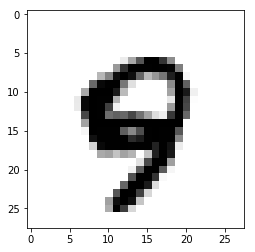

In [8]:
# plt.imshow(x_train[10232].reshape(28,28), cmap=cm.binary)

In [9]:
# y_train[0]

5

In [10]:
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [12]:
# y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [14]:
# model.fit(x_train, y_train,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#          validation_data=(x_test, y_test))

In [15]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [16]:
# model.reset_states()
# keras.backend.clear_session() #destroyes current graph
# sess = tf.Session(config=config)

In [29]:
model.fit(X_train, Y_train,
         batch_size=batch_size,
         epochs=30,
         verbose=1,
         validation_data=(X_dev, Y_dev))

Train on 31500 samples, validate on 10500 samples
Epoch 1/40
31500/31500 [==============================] - 2s 68us/step - loss: 0.8100 - acc: 0.7612 - val_loss: 0.2196 - val_acc: 0.9365
Epoch 2/40
31500/31500 [==============================] - 2s 53us/step - loss: 0.1779 - acc: 0.9462 - val_loss: 0.1148 - val_acc: 0.9660
Epoch 3/40
31500/31500 [==============================] - 2s 53us/step - loss: 0.1126 - acc: 0.9660 - val_loss: 0.0780 - val_acc: 0.9753
Epoch 4/40
31500/31500 [==============================] - 2s 54us/step - loss: 0.0846 - acc: 0.9745 - val_loss: 0.0656 - val_acc: 0.9799
Epoch 5/40
31500/31500 [==============================] - 2s 53us/step - loss: 0.0684 - acc: 0.9786 - val_loss: 0.0592 - val_acc: 0.9819
Epoch 6/40
31500/31500 [==============================] - 2s 52us/step - loss: 0.0568 - acc: 0.9818 - val_loss: 0.0489 - val_acc: 0.9849
Epoch 7/40
31500/31500 [==============================] - 2s 50us/step - loss: 0.0500 - acc: 0.9842 - val_loss: 0.0462 - val_acc

In [18]:
Y_predicted = model.predict(X_test)

In [19]:
Y_predicted = np.argmax(Y_predicted, 1)

In [20]:
Y_predicted[0]

2

In [22]:
with open('submission-cnn-keras.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['ImageId', 'Label'])
    for i in range(Y_predicted.shape[0]):
        writer.writerow([i+1, Y_predicted[i]])